In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from otter import Notebook

**------**

**For any additional support needed for this assignment, please use any/all of these resources:**
* Data Peer Consulting ([Virtual Drop-In 12-4pm Monday-Friday](https://data.berkeley.edu/academics/campus-resources/data-peer-consulting))
    * They are trained and familiar with Jupyter Notebooks and this material, and love answering your questions!
* Email Skye with any questions at sabrinaskyepickett@berkeley.edu
* Come to Skye and Caitlin's Office Hour(s) -- stay tuned for an announcement from your Professor
    * Sunday 4/17 7-8pm: 
        https://berkeley.zoom.us/j/94497745159

    * Thursday 4/21 6-7pm:
        https://berkeley.zoom.us/j/95687602545
        
**------**

# COVID-19 in Prisons

In California, during the early months of the COVID-19 pandemic, Coronavirus spread most quickly through state prisons. Due to the close proximity of roommates, poor living conditions, and uncertainty of the transmissibility of the virus, it became extremely difficult to contain outbreaks. The data we'll be analyzing comes from California's open data portal. Feel free to read more about the data on the [CDCR's website](https://data.ca.gov/dataset/cdcr-population-covid-19-tracking).

In [2]:
# load the data
covid_in_prisons = pd.read_csv('covid19dashboard.csv')
covid_in_prisons

,Date,InstitutionName,Latitude,Longitude,TotalConfirmed,TotalDeaths,DistinctPatientsTested,NewInTheLast14Days
0,2020-03-10,Avenal State Prison (ASP),35.930766,-120.100570,0,0,0,0
1,2020-03-10,California City Correctional Facility (CAC),35.139327,-117.914730,0,0,1,0
2,2020-03-10,Calipatria State Prison (CAL),33.131764,-115.512080,0,0,0,0
3,2020-03-10,California Correctional Center (CCC),40.446063,-120.664132,0,0,0,0
4,2020-03-10,California Correctional Institution (CCI),35.132673,-118.507810,0,0,0,0
...,...,...,...,...,...,...,...,...
25755,2022-01-06,Salinas Valley State Prison (SVSP),36.518179,-121.425570,689,6,63,5
25756,2022-01-06,Valley State Prison (VSP),37.127525,-120.505740,1783,2,161,20
25757,2022-01-06,Wasco State Prison (WSP),35.605045,-119.371430,2441,2,306,471
25758,2022-01-07,Avenal State Prison (ASP),35.930766,-120.100570,3145,8,122,8


### About the Data

Before we jump into any data analysis, it's important to familiarize ourselves with the dataset. 

Recall that the 'prisons' dataset was a Table. Here, the covid_in_prisons dataset is a DataFrame. (If you'd like to know more, read through the documentation of [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).) It looks just like a table did and has very similar features, but slightly different ways to walk through them.

<!-- BEGIN QUESTION --> 


<font color = #d14d0f>**QUESTION 1**:</font> Scroll through the prisons dataset above. What do you notice? What do the rows and columns mean?

*Replace this text with your response!*

<!-- END QUESTION -->
In this notebook, we are focusing less on the technicalities of code writing and more on the common techniques that are used to manipulate data that we have already seen.  

Below, display the different column names.

In [3]:
covid_in_prisons.columns

Index(['Date', 'InstitutionName', 'Latitude', 'Longitude', 'TotalConfirmed',
       'TotalDeaths', 'DistinctPatientsTested', 'NewInTheLast14Days'],
      dtype='object')

Each row represents a prison or detention center on a particular day. The data starts March 10, 2020 and ends January 7, 2022. Below, display the different prisons and detention centers represented in the data using the *unique()* function of DataFrames.

In [4]:
institution_names = covid_in_prisons['InstitutionName'].unique()
institution_names

array(['Avenal State Prison (ASP)',
       'California City Correctional Facility (CAC)',
       'Calipatria State Prison (CAL)',
       'California Correctional Center (CCC)',
       'California Correctional Institution (CCI)',
       "Central California Women's Facility (CCWF)",
       'California State Prison-Centinela (CEN)',
       'California Health Care Facility (CHCF)',
       'California Institution for Men (CIM)',
       'California Institution for Women (CIW)',
       "California Men's Colony (CMC)",
       'California Medical Facility (CMF)',
       'California State Prison-Corcoran (COR)',
       'California Rehabilitation Center (CRC)',
       'Correctional Training Facility (CTF)',
       'Chuckawalla Valley State Prison (CVSP)',
       'Deuel Vocational Institution (DVI)', 'Folsom State Prison (FSP)',
       'High Desert State Prison (HDSP)', 'Ironwood State Prison (ISP)',
       'Kern Valley State Prison (KVSP)',
       'California State Prison-Los Angeles County (LAC)

Based on the following cell's code, we can see that there are 35 institutions represented in the covid_in_prisons DataFrame.

In [5]:
# len() is a function that takes the length of an array/list (in this case, institution_names)
len(institution_names)

35

To see how many rows/records there are for any Institution in our DataFrame, we take the sum of the amount of rows that have the given Institution Name in its 'InstitutionName' column.

Written in code, this is *sum(covid_in_prisons['InstitutionName'] == 'Example Prison')*. 

In the below cell, we've found the total number of rows/records from Avenal State Prison that exist in the covid_in_prisons DataFrame.

In [6]:
sum(covid_in_prisons['InstitutionName'] == 'Avenal State Prison (ASP)')

736

<!-- BEGIN QUESTION --> 


<font color = #d14d0f>**QUESTION 2**:</font> Replicate the code from the cell above to find the amount of rows/records from San Quentin State Prison. (Feel free to copy & paste the above cell.)

*Note: For your code to work, the prison name needs to be written identically to how it is represented in institution_names (including spaces, capitalization, and parenthesis). **It is written in institution_names as: 'San Quentin State Prison (SQ)'***

In [7]:
... # Delete this comment and write your line of code here
# (copy and paste the cell above then modify the prison name!)

Ellipsis

Your answer should again be 736!
<!-- END QUESTION --> 
We can actually see that there are the same number (736) of records/rows for each Institution in our DataFrame by running the following cell. (There will be more discussion on how this doesn't imply that the data from each Institution is collected in the same ways.)

In [8]:
covid_in_prisons.groupby('InstitutionName').size()

InstitutionName
Avenal State Prison (ASP)                           736
California City Correctional Facility (CAC)         736
California Correctional Center (CCC)                736
California Correctional Institution (CCI)           736
California Health Care Facility (CHCF)              736
California Institution for Men (CIM)                736
California Institution for Women (CIW)              736
California Medical Facility (CMF)                   736
California Men's Colony (CMC)                       736
California Rehabilitation Center (CRC)              736
California State Prison-Centinela (CEN)             736
California State Prison-Corcoran (COR)              736
California State Prison-Los Angeles County (LAC)    736
California State Prison-Sacramento (SAC)            736
California State Prison-Solano (SOL)                736
Calipatria State Prison (CAL)                       736
Central California Women's Facility (CCWF)          736
Chuckawalla Valley State Prison 

Now, let's start our EDA (exploratory data analysis). 

### Exploratory Data Analysis (EDA)

**IMPORTANT NOTE:** the columns *TotalConfirmed* and *TotalDeaths* in the prisons dataset are **cummulative**. 

For example, if we take row 9992 in the covid_in_prisons dataset and look at the number in the 'TotalConfirmed' column, 111 represented the TOTAL number of confirmed cases at Ironwood State Prison (ISP) up until 10/13/20. It's important to recognize that there were not 111 new cases at ISP on this day, rather 111 total confirmed cases at ISP up until 10/13/20.

In [9]:
# This function grabs the 9992nd row and shows the data from each column for this particular row.
covid_in_prisons.iloc[9992]
# Read the notes about what this data means above!

Date                                       2020-10-13
InstitutionName           Ironwood State Prison (ISP)
Latitude                                     33.59869
Longitude                                 -114.652517
TotalConfirmed                                    111
TotalDeaths                                         1
DistinctPatientsTested                             16
NewInTheLast14Days                                 22
Name: 9992, dtype: object

Below, let's isolate the data from the last day in the data set. This way, we can see the total number of confirmed cases along with the total number of deaths from each prison/detention center. We'll isolate data from 1/6/22.

In [10]:
jan6_22 = covid_in_prisons[covid_in_prisons['Date'] == '2022-01-06']
jan6_22 = jan6_22.sort_values('TotalConfirmed', ascending=False)
jan6_22

,Date,InstitutionName,Latitude,Longitude,TotalConfirmed,TotalDeaths,DistinctPatientsTested,NewInTheLast14Days
25723,2022-01-06,Avenal State Prison (ASP),35.930766,-120.100570,3145,8,91,9
25751,2022-01-06,Substance Abuse Treatment Facility (SATF),36.177361,-119.820420,3137,7,100,5
25737,2022-01-06,Correctional Training Facility (CTF),36.411760,-121.326170,2741,21,82,1
25736,2022-01-06,California Rehabilitation Center (CRC),33.925885,-117.559780,2499,1,883,460
25733,2022-01-06,California Men's Colony (CMC),35.221085,-120.636399,2498,13,110,4
25757,2022-01-06,Wasco State Prison (WSP),35.605045,-119.371430,2441,2,306,471
25754,2022-01-06,San Quentin State Prison (SQ),37.943365,-122.490290,2269,28,27,5
25741,2022-01-06,High Desert State Prison (HDSP),40.474951,-120.676850,2087,2,146,11
25748,2022-01-06,Pleasant Valley State Prison (PVSP),36.194736,-120.308650,2047,3,297,19
25731,2022-01-06,California Institution for Men (CIM),34.015963,-117.687370,1942,30,393,340


According to the table above, the center with the highest number of confirmed cases is Avenal State Prison (ASP). The center with the lowest number of confirmed cases is Pelican Bay State Prison (PMSP). Note, that we have no data on how often each prison tests inmates. Some centers may test more frequently than others, causing a higher case count because an individual can test positive multiple times.

<!-- BEGIN QUESTION --> 


<font color = #d14d0f>**QUESTION 3:**</font> The table above is sorted in decreasing order according to the "TotalConfirmed" column. Do you recognize any prisons that are at the top of the table? 

*Replace this text with your response!*

<!-- END QUESTION --> 
Next, we will create a histogram to visualize the 8 institutions with the highest total confirmed cases.

Text(0.5, 1.0, 'Total Confirmed Cases for Top 8 Institutions')

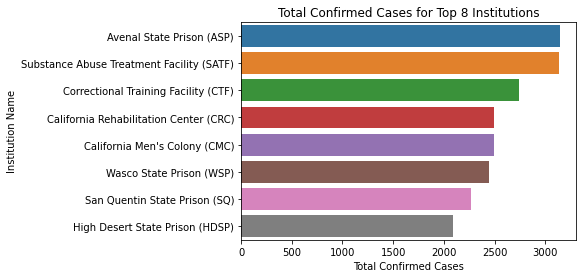

In [11]:
top8 = jan6_22[:8].reset_index()
sns.barplot(data=top8, y="InstitutionName", x='TotalConfirmed')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Institution Name')
plt.title('Total Confirmed Cases for Top 8 Institutions')

<!-- BEGIN QUESTION --> 


<font color = #d14d0f>**QUESTION 4:**</font> What are some potential issues in drawing conclusions based on solely totals in data?

*Hint: Consider how the populations of each prison may relate to the number of positive cases.*

*Replace this text with your response!*

<!-- END QUESTION --> 

Totals are very helpful units of measure because they indicate exact values. However, (especially if you're stuck on Question 4) consider: In a histogram like above, a Prison with 200 positive cases would be represented as a very small value. Notice that a Prison with 200 positive cases and a population of 250 is a highly contaminated prison, while a Prison with 200 positive cases and a population of 2000 is not as significant. 

For the rest of this notebook we are going to use the totals. We noted this just to remind you to always consider factors of the data that can misleading and to acknowledge what is and is not represented in the covid_in_prisons DataFrame.

Next, let's analyze the total number of new cases in the 14 days before each collection record (from the 'NewInTheLast14Days' column) across all institutions. 

In [12]:
per14Days = covid_in_prisons.groupby('Date')['NewInTheLast14Days'].agg(np.sum).to_frame().reset_index()
per14Days

,Date,NewInTheLast14Days
0,2020-03-10,0
1,2020-03-11,0
2,2020-03-12,0
3,2020-03-13,0
4,2020-03-14,0
...,...,...
731,2022-03-11,768
732,2022-03-12,686
733,2022-03-13,675
734,2022-03-14,668


Next, create a line plot below to visualize the table above. 

Text(0.5, 1.0, 'New Cases Per 14 Day Period')

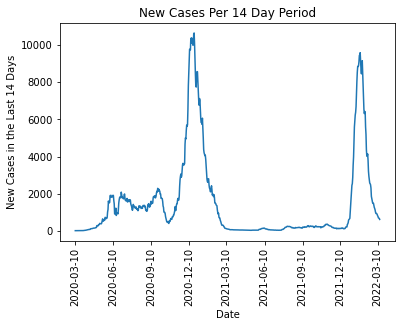

In [13]:
sns.lineplot(data=per14Days,  x='Date', y='NewInTheLast14Days')
plt.xticks(['2020-03-10', '2020-06-10', '2020-09-10', '2020-12-10', '2021-03-10', '2021-06-10', '2021-09-10', '2021-12-10', '2022-03-10'], rotation=90)
plt.ylabel('New Cases in the Last 14 Days')
plt.title('New Cases Per 14 Day Period')

<!-- BEGIN QUESTION --> 


<font color = #d14d0f>**QUESTION 5:**</font> What do you notice about the above line plot? In what months and years do the two main peaks seem to coincide with? *Optional:* Any ideas about what was going on during these times in regards to COVID-19?

*Replace this text with your response!*

<!-- BEGIN QUESTION --> 

Below, calculate the death rate for each institution (from Jan 6, 2022).

In [14]:
# Since the data is cummulative, the data from the jan6_22 DataFrame is the sum. Then find the percent by divinding by 736.
# Recall that 736 is the number of rows in the DataFrame for each institution
rates = jan6_22['TotalDeaths']/736

# Create a new column in the jan6_22 DataFrame 
jan6_22['DeathRates'] = rates

# Sort the DeathRates column in descending order.
jan6_22.sort_values('DeathRates', ascending=False)

,Date,InstitutionName,Latitude,Longitude,TotalConfirmed,TotalDeaths,DistinctPatientsTested,NewInTheLast14Days,DeathRates
25731,2022-01-06,California Institution for Men (CIM),34.015963,-117.687370,1942,30,393,340,0.040761
25754,2022-01-06,San Quentin State Prison (SQ),37.943365,-122.490290,2269,28,27,5,0.038043
25737,2022-01-06,Correctional Training Facility (CTF),36.411760,-121.326170,2741,21,82,1,0.028533
25730,2022-01-06,California Health Care Facility (CHCF),37.955474,-121.190640,686,19,311,17,0.025815
25749,2022-01-06,Richard J. Donovan Correctional Facility (RJD),32.572602,-116.918724,1079,18,52,58,0.024457
25744,2022-01-06,California State Prison-Los Angeles County (LAC),34.728857,-118.326830,1564,14,364,33,0.019022
25733,2022-01-06,California Men's Colony (CMC),35.221085,-120.636399,2498,13,110,4,0.017663
25734,2022-01-06,California Medical Facility (CMF),38.348960,-121.908324,772,12,347,42,0.016304
25745,2022-01-06,Mule Creek State Prison (MCSP),38.346132,-120.945160,1937,9,167,32,0.012228
25738,2022-01-06,Chuckawalla Valley State Prison (CVSP),33.628333,-114.619050,1824,9,103,11,0.012228


<!-- BEGIN QUESTION --> 


<font color = #d14d0f>**QUESTION 6:**</font> Name the three institutions with the highest COVID-19 death rates based on the DataFrame above. Read through the comments of the cell above for an explanation of how the DataFrame above was created.

*Replace this text with your response!*

<!-- END QUESTION --> 
Below we plot line graphs that show the Positive COVID Cases and COVID Deaths over time at the two prisons with the highest death rate in our data set (**California Institution for Men (CIM)** and **San Quentin State Prison (SQ)**).

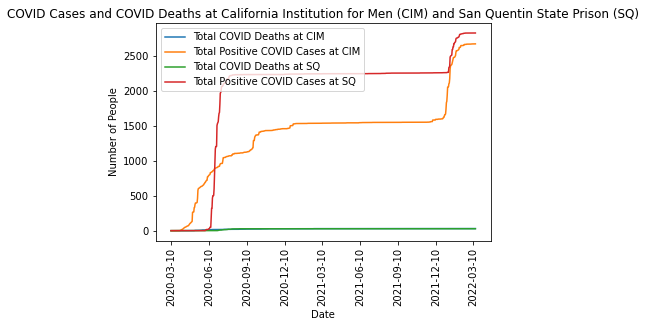

In [15]:
# Run this code to create line plots ... feel free to ignore this code or take a look if interested!
CIM_only = covid_in_prisons[covid_in_prisons['InstitutionName'] == 'California Institution for Men (CIM)'].sort_values('Date')
sns.lineplot(x = 'Date', y='TotalDeaths', data=CIM_only, label = 'Total COVID Deaths at CIM')
sns.lineplot(x = 'Date', y='TotalConfirmed', data=CIM_only, label = 'Total Positive COVID Cases at CIM')
SQ_only = covid_in_prisons[covid_in_prisons['InstitutionName'] == 'San Quentin State Prison (SQ)'].sort_values('Date')
sns.lineplot(x = 'Date', y='TotalDeaths', data=SQ_only, label = 'Total COVID Deaths at SQ')
sns.lineplot(x = 'Date', y='TotalConfirmed', data=SQ_only, label = 'Total Positive COVID Cases at SQ')
plt.title('COVID Cases and COVID Deaths at California Institution for Men (CIM) and San Quentin State Prison (SQ)')
plt.ylabel('Number of People')
plt.xticks(['2020-03-10', '2020-06-10', '2020-09-10', '2020-12-10', '2021-03-10', '2021-06-10', '2021-09-10', '2021-12-10', '2022-03-10'], rotation=90);

Note that even though you likely can't see the whole lines for the Total COVID Deaths of both institutions, they are both there but they just overlap.
<!-- BEGIN QUESTION --> 

<font color = #d14d0f>**QUESTION 7:**</font> Which institution seems to have had a major spike in Total Positive COVID Cases in 2020? Approximately what month(s) did this take place in?

*Replace this text with your response!*

### San Quentin State Prison in 2020

<!-- END QUESTION --> 
We will now look at San Quentin State Prison in particular during 2020, the primary pandemic year. We will plot 3 different lines on one graph to compare the San Quentin State Prison's population, cumulative positive COVID cases, and cumulative deaths caused by COVID. 

In [16]:
SQ_Covid_2020 = pd.read_csv("./data/SQ_2020.csv") #importing cleaned data about San Quentin SP for 2020
prisons_df = pd.read_csv("./data/monthly_cdcr_upto2022.csv") #importing prisons table from Lecture 1 as a DataFrame
SQ_pop_df = prisons_df[prisons_df['institution_name']== 'SQ (SAN QUENTIN SP)']
SQ_pop_2020 = SQ_pop_df[SQ_pop_df['year'] == 2020]
# Run this cell, it isn't supposed to return anything since there are only assignment statements

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


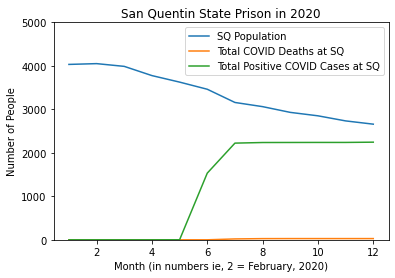

In [17]:
sns.lineplot('month', 'population_felons', data=SQ_pop_2020, label='SQ Population');
sns.lineplot(x = 'Date', y='Total Deaths', data=SQ_Covid_2020, label = 'Total COVID Deaths at SQ');
sns.lineplot(x = 'Date', y='Total Confirmed', data=SQ_Covid_2020, label = 'Total Positive COVID Cases at SQ');
plt.xlabel('Month (in numbers ie, 2 = February, 2020)')
plt.ylabel('Number of People')
plt.title('San Quentin State Prison in 2020')
plt.ylim(0,5000);
# Don't worry if a red message pops up with your graph - it is a warning, but not an error.
# All you need for analysis is the graph

<!-- BEGIN QUESTION --> 

<font color = #d14d0f>**QUESTION 8:**</font> Based on this graph, assign a range of months to the following: 

(Replace each **...** below with your response.)

**Little to no COVID cases in the following month range:** ... 

**Rapidly increasing amount of COVID cases in the following month range:** ...

**High but plateauing/minimally changing amount of COVID cases in the following month range:**  ...

<!-- END QUESTION --> 
As you may have noticed, the graph shows a decline in San Quentin State Prison population by about 1,000 people from the start to end of the year 2020. The San Quentin State Prison website from CDCR (the source of the data) spoke to this decrease in population with this statement: "*To reduce crowding and promote better physical distancing, San Quentin State Prison’s inmate population has been reduced from 4,051 in March [2020] to 3,129 on Aug. 12 [2020]. This reduction has been accomplished through the suspension of intake from county jails, expedited releases and natural releases from the prison.*"

<!-- BEGIN QUESTION --> 

<font color = #d14d0f>**QUESTION 9:**</font> What are your opinions on this quotation? What are the consequences (positive and/or negative) of these reactions to the COVID outbreak in San Quentin State Prison? *There is no right answer; This question looking for you to consider the quotation and the context of the data to formulate an opinion of your own.*

*Replace this text with your response!*

<!-- END QUESTION --> 
<!-- BEGIN QUESTION --> 

<font color = #d14d0f>**QUESTION 10:**</font> Reflection time! Please write a minimum of 4 sentences about what you've come to realize from this COVID_in_Prisons Homework Notebook.

If you need any ideas for what to brainstorm, consider these topics:
* San Quentin SP's [response to COVID outbreak in 2020](https://www.cdcr.ca.gov/covid19/san-quentin-state-prison-response/)
* The prisons with the most and least COVID cases (seen before Question 4)
* The spread of COVID-19 and diseases in institutions
* How the methods of data collected were or weren't helpful 
    * (how would you change it if you collected the data?)

*Replace this text with your response!*

<!-- END QUESTION --> 

Thank you for taking the time to complete the homework notebook! Remember if you are struggling to check out the **resources for help** listed at the top of this notebook to get all of your questions answered. We hope you enjoyed this notebook and are so glad you took a step out of your comfort zone to view this material from a new perspective.

**<font color = #d14d0f>TO SUBMIT YOUR HOMEWORK:</font>**

**1. Run all your cells by clicking "Cell" > "Run All".** (Should take no more than ~10 seconds)

**2. Save the notebook by clicking "File" > "Save and checkpoint".**

**3. Run the next cell!**

**4. Submit completed Lecture 1 notebook to your corresponding bCourses assignment.** (Click the link that the next cell returns, then upload the downloaded pdf to your bCourses assignment for Lecture #3 / Homework on Covid-19 in Prisons.)


In [18]:
#This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML
export_notebook("Lecture_3.ipynb", filtering=True, pagebreaks=True)
display(HTML("Save this notebook, then click <a href='Lecture_3.pdf' download>here</a> to open the pdf."))

If the cell above returns an error or clicking the link that is returned doesn't work for you, don't worry! Simply right click and choose **"Save Link As..." to save a copy of your pdf** onto your computer. Then, complete **Step 4: Submit completed Lecture 1 notebook to your corresponding bCourses assignment.**

---
Notebook developed by: Skye Pickett and Caitlin Yee

Data Science Modules: http://data.berkeley.edu/education/modules

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a98dcf0f-412a-41c3-9850-4403846da5b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>